In [486]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'black')
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [487]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [488]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2151,ham,I surely dont forgot to come:)i will always be...,NaN,NaN,NaN
698,ham,Mum ask Ì_ to buy food home...,NaN,NaN,NaN
1991,ham,No other Valentines huh? The proof is on your ...,NaN,NaN,NaN
1465,spam,YOU 07801543489 are guaranteed the latests Nok...,NaN,NaN,NaN
2176,ham,get ready to moan and scream :),NaN,NaN,NaN


In [489]:
df.shape

(5572, 5)

# Data Cleaning

In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [492]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [493]:
df.sample(5)

,v1,v2
5175,ham,Raji..pls do me a favour. Pls convey my Birthd...
4953,ham,U coming back 4 dinner rite? Dad ask me so i r...
1872,ham,Oh ok i didnt know what you meant. Yep i am ba...
3029,ham,"Also sir, i sent you an email about how to log..."
2693,ham,All these nice new shirts and the only thing I...


In [494]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
4251,ham,"Send ur birthdate with month and year, I will ..."
724,ham,The world is running and i am still.maybe all ...
5251,ham,"Yeah work is fine, started last week, all the ..."
68,spam,"Did you hear about the new \Divorce Barbie\""? ..."
2905,ham,"Helloooo... Wake up..! \Sweet\"" \""morning\"" \""..."


In [495]:
df['target'] = encoder.fit_transform(df['target'])

In [496]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [497]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [498]:
df.duplicated().sum()

403

In [499]:
df = df.drop_duplicates(keep = 'first')

In [500]:
df.duplicated().sum()

0

In [501]:
df.shape

(5169, 2)

# EDA

In [503]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [504]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x11a223fcc80>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

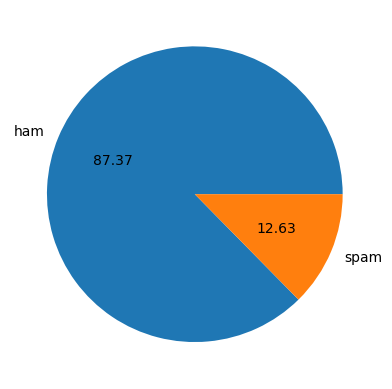

In [505]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")

In [506]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [507]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [508]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [509]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [510]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [511]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

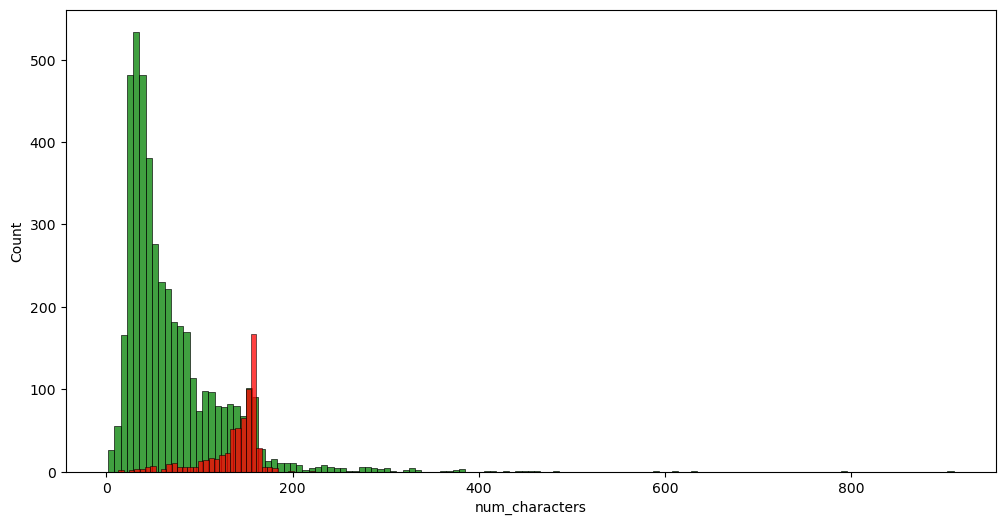

In [512]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_characters'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

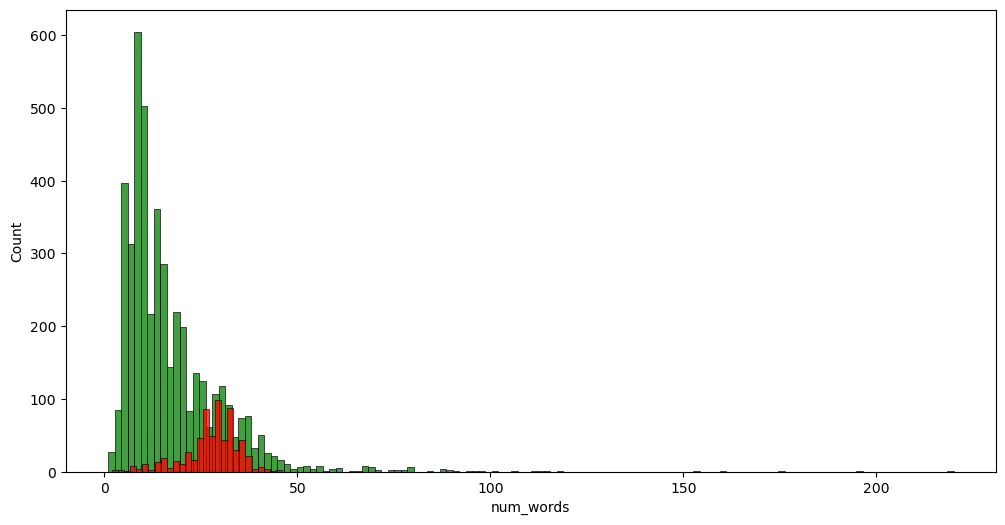

In [513]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target'] == 0]['num_words'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

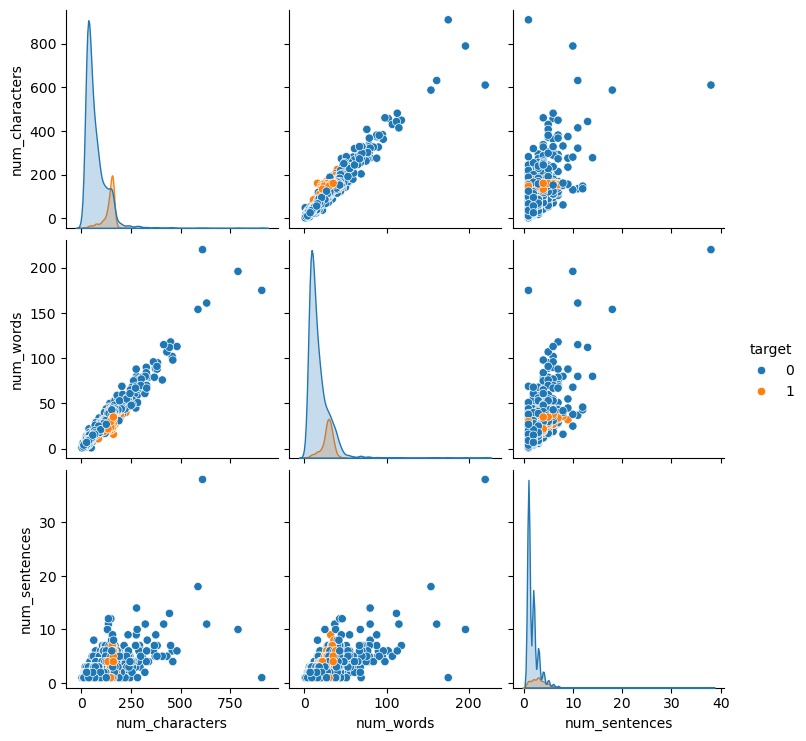

In [514]:
sns.pairplot(df,hue = 'target')

<Axes: >

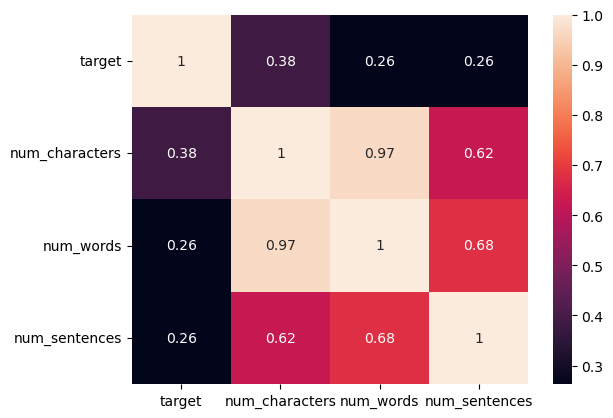

In [515]:
numerical_df = df[['target', 'num_characters', 'num_words', 'num_sentences']]
sns.heatmap(numerical_df.corr(), annot = True)

# DATA PREPROCESSING

- Lower Case
- Tokenize
- Removing Special Characters
- Removing Stop Words and Punctuations
- Stemming

In [517]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
 
    return " ".join(y)

In [518]:
df['transformed_text'] = df['text'].apply(transform_text)

In [519]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [520]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

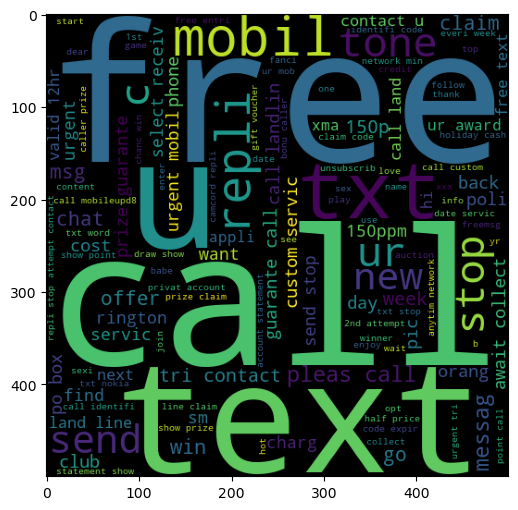

In [521]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [522]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

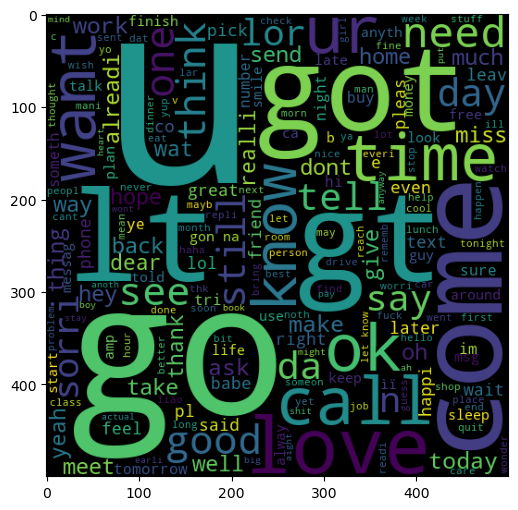

In [523]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [524]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [525]:
len(spam_corpus)

9939

<function matplotlib.pyplot.show(close=None, block=None)>

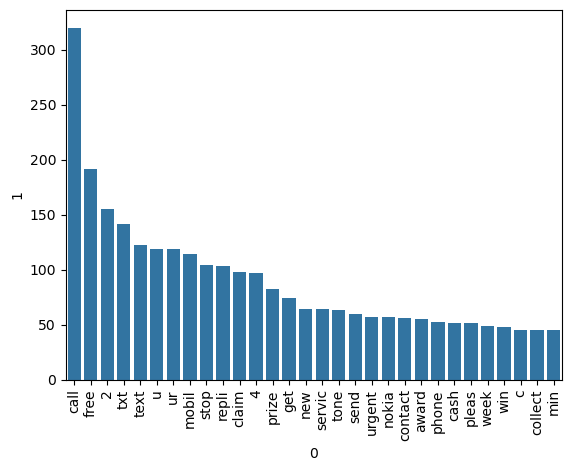

In [526]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show

In [527]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [528]:
len(ham_corpus)

35404

<function matplotlib.pyplot.show(close=None, block=None)>

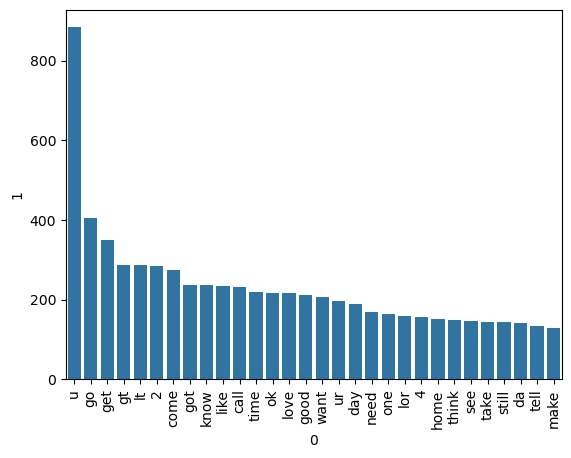

In [529]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show

# Model Building

In [531]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [532]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [533]:
X.shape

(5169, 3000)

In [534]:
y = df['target'].values

In [535]:
from sklearn.model_selection import train_test_split

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

In [537]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [538]:
mnb = MultinomialNB()

In [539]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0
